# Vector Calculus

Many algorithms in machine learning optimize an objective function with
respect to a set of desired model parameters that control how well a model
explains the data: Finding good parameters can be phrased as an optimization
problem. Examples include:
- Linear regression
- Neural-networks
- Gaussian mixture models

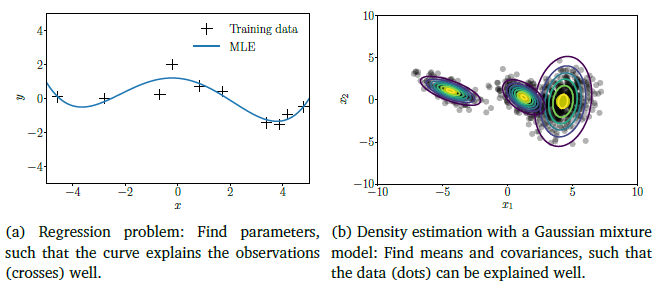

Above, we typically
solve by using optimization algorithms that exploit gradient information.

Central to this chapter is the concept of a function. A function $f$ is
a quantity that relates two quantities to each other. these
quantities are typically inputs $x \in \mathbb{R}^D$ and targets (function values) $f(x)$,
which we assume are real-valued if not stated otherwise.

Computing gradients of functions is often essential to facilitate learning in machine learning models
since the gradient points in the direction of steepest ascent. Therefore, vector calculus is one of the fundamental mathematical tools we need in
machine learning.

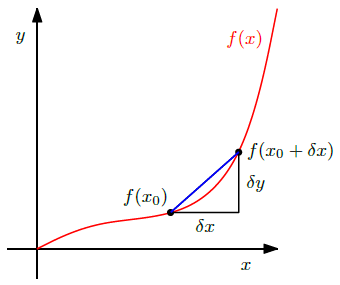

Above, the average incline of a function $f$ between $x_0$ and $x_0 + \delta x$ is the incline of a secant (blue) through $f(x_0)$ and $f(x_0 + \delta x)$ and given by $\delta y / \delta x$

## Differentiation of Univariate Functions

The difference quotient:

\begin{equation}
\frac{\delta y}{\delta x} := \frac{f(x + \delta x) - f(x)}{\delta x}
\end{equation}

computes the slope of the secant line through two points on the graph of $f$.

The difference quotient can also be considered the average slope of $f$ between $x$ and $x + \delta x$ if we assume $f$ to be a linear function. In the limit for $\delta x \rightarrow 0$, we obtain the tangent of $f$ at $x$, if $f$ is differentiable (derivative exists). The tangent is then the derivative of $f$ at $x$.

Derivative: More formally, for $h > 0$ the derivative of $f$ at $x$ is defined as the limit:

\begin{equation}
\frac{d f}{d x} := \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
\end{equation}

The derivative of $f$ points in the direction of steepest ascent of $f$


### Partial Differentiation and Gradients

Differentiation as discussed in above applies to functions $f$ of a
scalar variable $x \in \mathbb{R}$. In the following, we consider the general case
where the function $f$ depends on one or more variables $x \in \mathbb{R}$, e.g.,
$f(x) = f(x_1, x_2)$. The generalization of the derivative to functions of several
variables is the gradient.

We find the gradient of the function $f$ with respect to $x$ by varying one
variable at a time and keeping the others constant. The gradient is then
the collection of these partial derivatives.

Partial Derivative:
\begin{equation}
\frac{\delta f}{\delta x_1} = \lim_{h \rightarrow 0} \frac{f(x_1 + h, x_2, \cdots, x_n) - f(x)}{h}\\
\vdots\\
\frac{\delta f}{\delta x_1} = \lim_{h \rightarrow 0} \frac{f(x_1, x_2, \cdots, x_n + h) - f(x)}{h}
\end{equation}

and collect them in the row vector

\begin{equation}
\bigtriangledown_x f = grad f = \frac{df}{dx} = \left[ \frac{\delta f(x)}{\delta x_1} \frac{\delta f(x)}{\delta x_2} \cdots \frac{\delta f(x)}{\delta x_n} \right] \in \mathbb{R}^{1 x n}
\end{equation}

where n is the number of variables and 1 is the dimension of the image/
range/codomain of $f$. Here, we defined the column vector $x = [x_1, \cdots, x_n]^\intercal \in \mathbb{R}^n$. The row vector in is called the gradient of f or the Jacobian.

### Basic Rules of Partial Differentiation

Our gradients now involve vectors and matrices, and matrix multiplication is not commutative (the order matters).
Here are the general product rule, sum rule, and chain rule:

\begin{equation}
\text{Product Rule: } \frac{\delta}{\delta x}(f(x)g(x)) = \frac{\delta f}{\delta x}g(x) + f(x)  \frac{\delta g}{\delta x}
\end{equation}
\
\begin{equation}
\text{Sum Rule: } \frac{\delta}{\delta x}(f(x)g(x)) = \frac{\delta f}{\delta x}g(x) + \frac{\delta g}{\delta x}
\end{equation}
\
\begin{equation}
\text{Chain rule: } \frac{\delta}{\delta x}(g \circ f) = \frac{\delta}{\delta x}(g(f(x))) = \frac{\delta g}{\delta f} \frac{\delta f}{\delta x}
\end{equation}

### Chain Rule

Consider a function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ of two variables $x_1, x_2$. Furthermore, $x_1(t)$ and $x_2(t)$ are themselves functions of $t$. To compute the gradient of
$f$ with respect to $t$, we need to apply the chain rule for multivariate
functions as

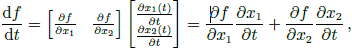

where $d$ denotes the gradient of the $\delta$ partial derivatives.

If $f(x_1, x_2)$ is a function of $x1$ and $x2$, where $x_1(s, t)$ and $x_2(s, t)$ are
themselves functions of two variables $s$ and $t$, the chain rule yields the
partial derivatives

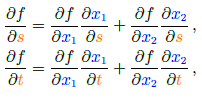

and the gradient is obtained by the matrix multiplication

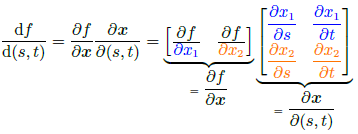

## Gradients of Matrices

We will encounter situations where we need to take gradients of matrices
with respect to vectors (or other matrices), which results in a multidimensional
tensor. We can think of this tensor as a multidimensional array that collects partial derivatives. For example, if we compute the gradient of an
$m \times n$ matrix $A$ with respect to a $p \times q$ matrix $B$, the resulting Jacobian
would be $(m \times n)\times(p \times q)$, i.e., a four-dimensional tensor $J$, whose entries
are given as $J_{ijkl} = \delta A_{ij} = \delta B_{kl}$

## Backpropagation and Automatic Differentiation

In many machine learning applications, we find good model parameters
by performing gradient descent, which relies on the fact
that we can compute the gradient of a learning objective with respect
to the parameters of the model. For a given objective function, we can
obtain the gradient with respect to the model parameters using calculus
and applying the chain rule.

### Gradients in a Deep Network

An area where the chain rule is used to an extreme is deep learning, where
the function value y is computed as a many-level function composition

\begin{equation}
y = (f_K \circ f_{K-1} \circ \cdots f_1)(x) = f_k(f_{K-1}(\cdots(f_1(x))))
\end{equation}

where $x$ are the inputs, $y$ are the observations and every function $f_i,i=1,\cdots,K$ possesses its own parameters.

In neural networks with multiple layers, we have functions $\sigma (A_{i-1}x_{i-1}+b_{i-1})$ in the $i$th layer. Here $x_{i-1}$ is the output of layer $i - 1$ and $\sigma$ an activation function such as sigmoid, tanh or ReLU. In order to train these models, we require the
gradient of a loss function $L$ with respect to all model parameters $A_j, b_j for j=1, \cdots, K$. This also requires us to compute the gradient of $L$ with
respect to the inputs of each layer. For example, if we have inputs $x$ and
observations $y$ and a network structure defined by:

\begin{equation}
f_0 := x \\
f_1 := \sigma_i(A_{i-1} f_{i-1} + b_{i-1}), i=1, \cdots, K
\end{equation}

Below is an illustration of the above equation:

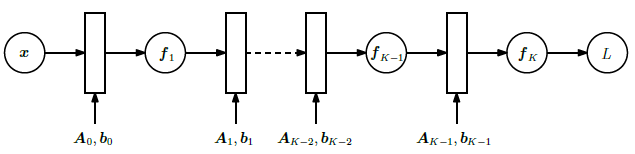

_Forward pass in a multi-layer neural network to compute the loss $L$ as a function of the inputs $x$ and the parameters $A_i$, $b_i$_

we may be interested in finding $A_j, b_j for j=1, \cdots, K-1$ such that the squared loss

\begin{equation}
L(\theta) = || y-f_k(\theta, x)||^2
\end{equation}

is minimized, where $\theta = \{A_0, b_0, \cdots, A_{K-1}, b_{K-1}\}$

To obtain the gradients with respect to the parameter set $\theta$, we require
the partial derivatives of $L$ with respect to the parameters $\theta_j = \{A_k, b_k\}$
of each layer $j=0, \cdots, K-1$. The chain rule allows us to determine the partial derivatives as

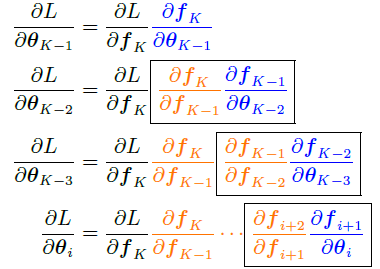

The orange terms are partial derivatives of the output of a layer with
respect to its inputs, whereas the blue terms are partial derivatives of
the output of a layer with respect to its parameters

The Figure below visualizes that the
gradients are passed backward through the network.

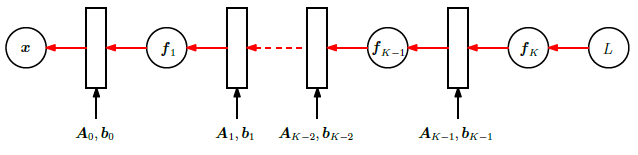

_Backward pass in a multi-layer neural network to compute the gradients of the loss function_

### Automatic Differentiation

It turns out that backpropagation is a special case of a general technique
in numerical analysis called automatic differentiation. We can think of au- automatic
tomatic differentation as a set of techniques to numerically (in contrast to differentiation
symbolically) evaluate the exact (up to machine precision) gradient of a
function by working with intermediate variables and applying the chain
rule. Automatic differentiation applies a series of elementary arithmetic
operations, e.g., addition and multiplication and elementary functions,
e.g., $sin, cos, exp, log$. By applying the chain rule to these operations, the
gradient of quite complicated functions can be computed automatically.
Automatic differentiation applies to general computer programs and has
forward and reverse modes.

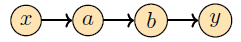

_Simple graph illustrating the flow of data from $x$ to $y$ via some intermediate variables $a, b$_

Figure above shows a simple graph representing the data flow from inputs
$x$ to outputs $y$ via some intermediate variables $a, b$. If we were to
compute the derivative $\frac{dy}{dx}$, we would apply the chain rule and obtain

\begin{equation}
\frac{dy}{dx} = \frac{dy}{db}\frac{db}{da}\frac{da}{dx}
\end{equation}

Intuitively, the forward and reverse mode differ in the order of multiplication. Due to the associativity of matrix multiplication, we can choose
between

\begin{equation}
\frac{dy}{dx} = \left(\frac{dy}{db}\frac{db}{da}\right)\frac{da}{dx} \\
\frac{dy}{dx} = \frac{dy}{db}\left(\frac{db}{da}\frac{da}{dx}\right)
\end{equation}

Top equation above would be the reverse mode because gradients are propagated backward through the graph, i.e., reverse to the data flow. Equation
above (bottom) would be the forward mode, where the gradients flow with
the data from left to right through the graph.